<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Technical-Analysis/SMAs_with_Average_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Yahoo Finance
!pip install -q yfinance

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from matplotlib import style

# Style charts
%matplotlib inline 
%config InclineBackend.figure_format = 'retina'

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Get SPY's stock data
SPY = yf.download('SPY', start='2020-01-01', end='2020-07-28', progress=False)
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,321.555786,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,319.120911,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,320.338379,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,319.437653,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,321.140106,68296000
...,...,...,...,...,...,...
2020-07-21,326.450012,326.929993,323.940002,325.010010,325.010010,57499000
2020-07-22,324.619995,327.200012,324.500000,326.859985,326.859985,57792900
2020-07-23,326.470001,327.230011,321.480011,322.959991,322.959991,75738000


In [5]:
# Extract the close prices from the data table
close = SPY['Adj Close']                                # Set the close prices equal to the 'Adj Close' column
close.index = pd.to_datetime(close.index)               # Set the index for the close prices to be the dates so that we have datetime values for the chart
close    

Date
2020-01-02    321.555786
2020-01-03    319.120911
2020-01-06    320.338379
2020-01-07    319.437653
2020-01-08    321.140106
                 ...    
2020-07-21    325.010010
2020-07-22    326.859985
2020-07-23    322.959991
2020-07-24    320.880005
2020-07-27    323.220001
Name: Adj Close, Length: 143, dtype: float64

<function matplotlib.pyplot.show>

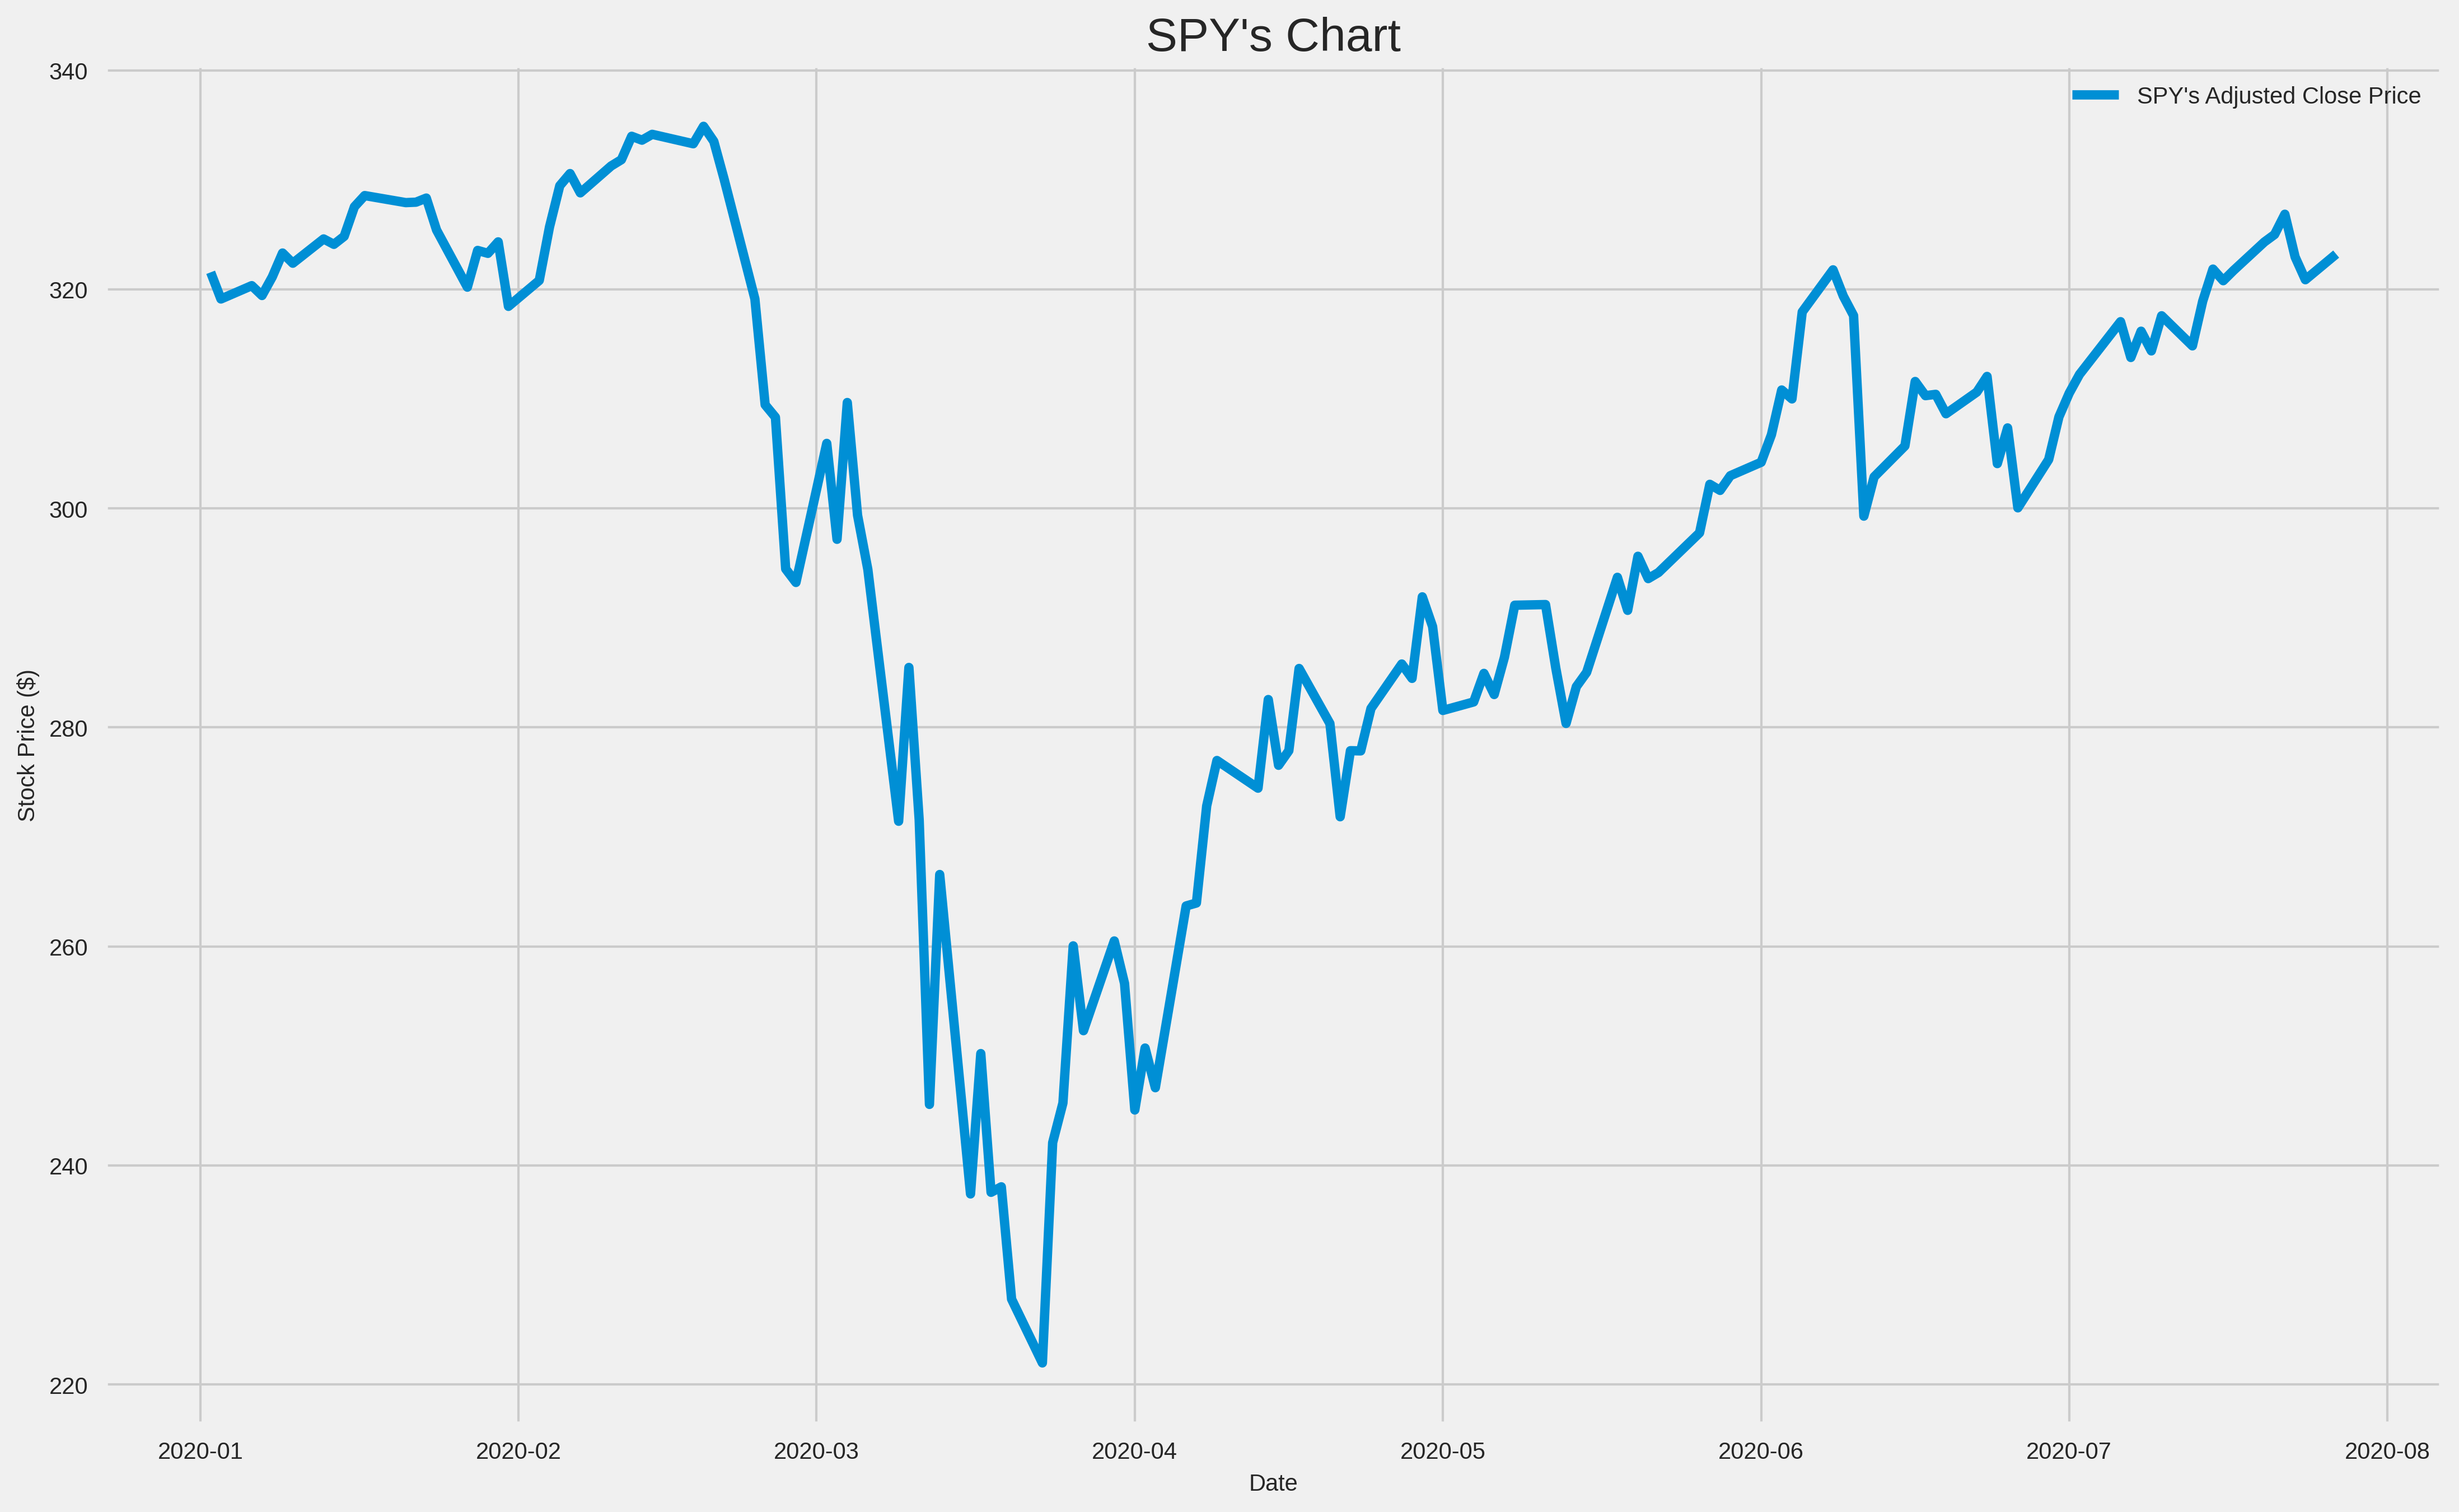

In [6]:
# Plot SPY's chart
plt.style.use('fivethirtyeight')                          # Use fivethirtyeight chart style
plt.plot(close, label="SPY's Adjusted Close Price")       # Plot the close prices
plt.title("SPY's Chart")                                  # Give the plot a title
plt.xlabel('Date', fontsize=10)                           # Label x-axis
plt.ylabel('Stock Price ($)', fontsize=10)                # Label y-axis

plt.legend()                                              # Add a legend
plt.tight_layout                                          # Tight layout format
plt.show                                                  # Show chart

In [7]:
# Change SPY's datatable to be indexed
SPY.reset_index(drop=False, inplace=True)                 
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,321.555786,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,319.120911,77709700
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,320.338379,55653900
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,319.437653,40496400
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,321.140106,68296000
...,...,...,...,...,...,...,...
138,2020-07-21,326.450012,326.929993,323.940002,325.010010,325.010010,57499000
139,2020-07-22,324.619995,327.200012,324.500000,326.859985,326.859985,57792900
140,2020-07-23,326.470001,327.230011,321.480011,322.959991,322.959991,75738000
141,2020-07-24,320.950012,321.989990,319.250000,320.880005,320.880005,73766600


In [8]:
# Extract the volume and date data
volume = SPY['Volume']
date = SPY['Date']

<function matplotlib.pyplot.show>

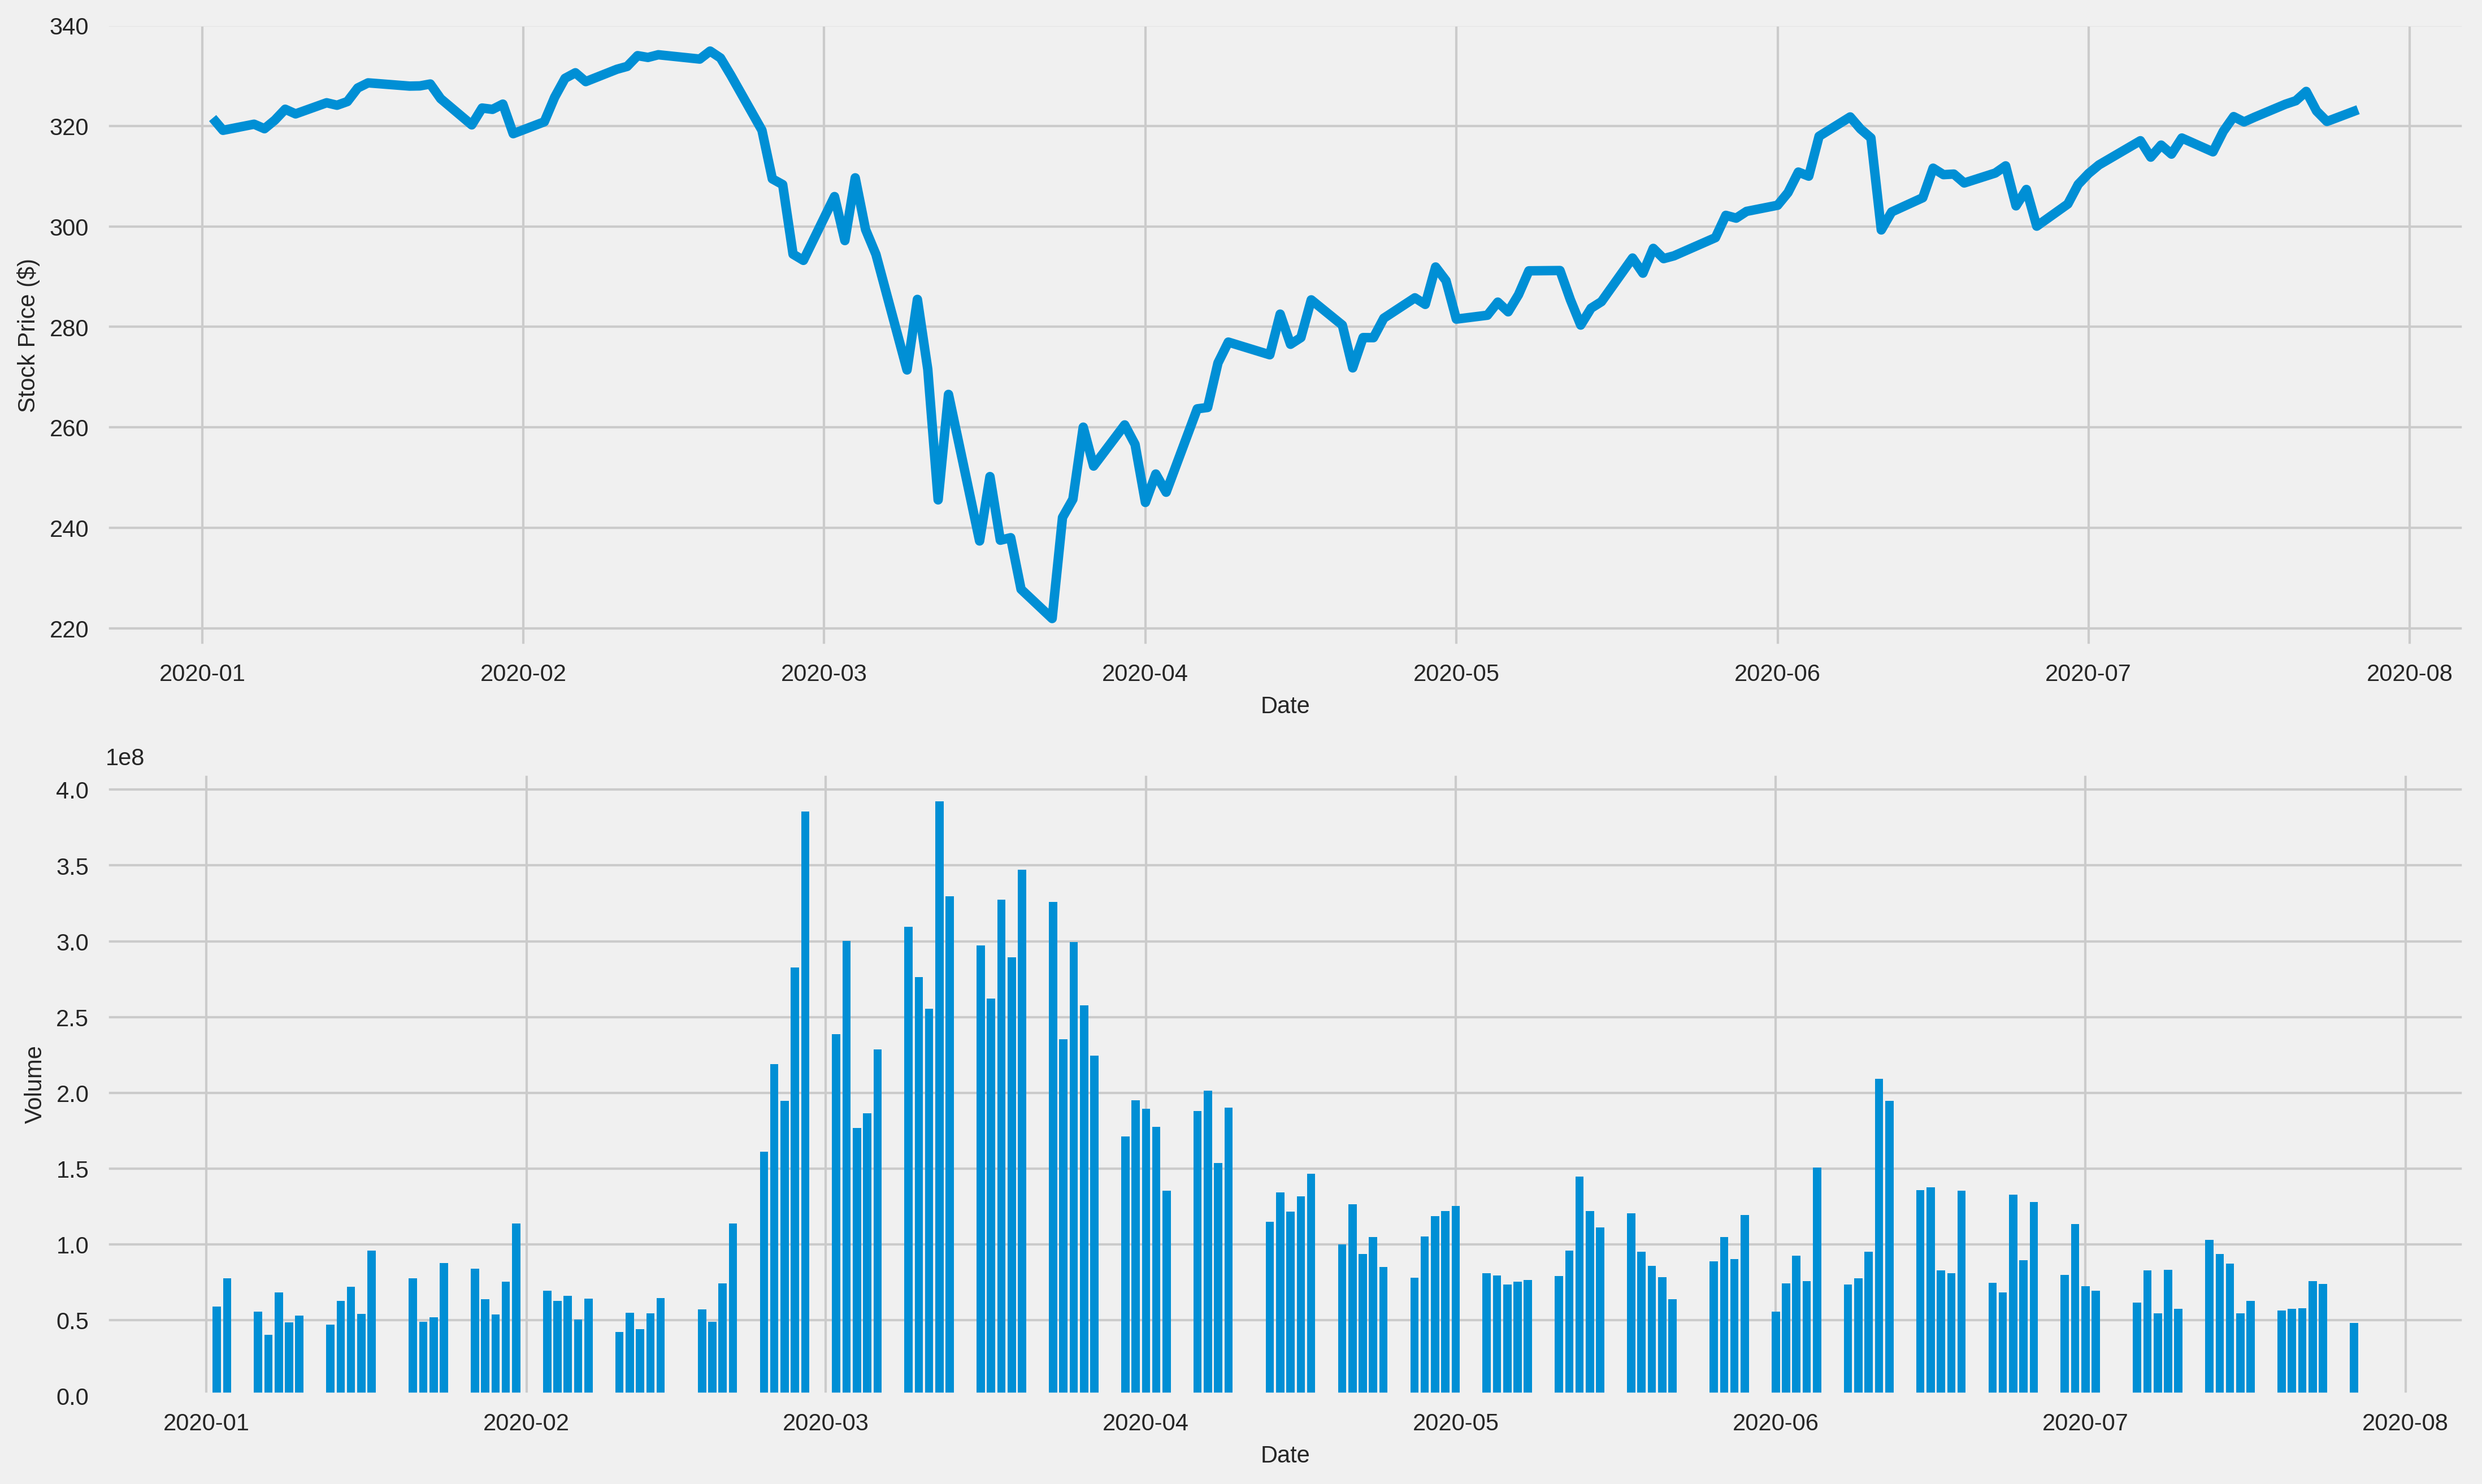

In [18]:
# Plot SPY's chart with volume
plt.style.use('fivethirtyeight')

plt.subplot(211)                                        # SPY's price chart
plt.plot(close, label="SPY's Adjusted Close Price")     # Plot the closing prices
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock Price ($)', fontsize=10)

plt.subplot(212)                                        # Volume chart
plt.xlabel('Date', fontsize=10)                         # Label x-axis
plt.ylabel('Volume', fontsize=10)                       # Label y-axis
plt.bar(date, volume)                                   # Plot the volume as a bar chart 

plt.tight_layout                                        # Tight layout format
plt.show                                                # Show chart

# can use the code: plt.figure(figsize = (16,10)) to set the figure size if not done in the beginning of the code

In [13]:
# Calculate the 50 day and 100 day simple moving averages for the stock price
sma50_for_chart = close.rolling(window=50).mean()            
sma100_for_chart = close.rolling(window=100).mean()

sma50_for_chart.tail(10)      # Show the last 10 values for the 50 day moving average

Date
2020-07-14    303.313920
2020-07-15    304.104368
2020-07-16    304.821446
2020-07-17    305.595754
2020-07-20    306.353762
2020-07-21    307.030788
2020-07-22    307.743618
2020-07-23    308.494537
2020-07-24    309.304813
2020-07-27    310.094783
Name: Adj Close, dtype: float64

In [14]:
# Calculate the 50 day simple moving average for the stock volume
sma50_for_volume = volume.rolling(50).mean()
sma50_for_volume.tail(10)     # Show the last 10 values for the 50 day moving average

133    96448002.0
134    96574468.0
135    96075520.0
136    95858366.0
137    95479534.0
138    95097072.0
139    94672326.0
140    94269670.0
141    92850580.0
142    91376882.0
Name: Volume, dtype: float64

<function matplotlib.pyplot.show>

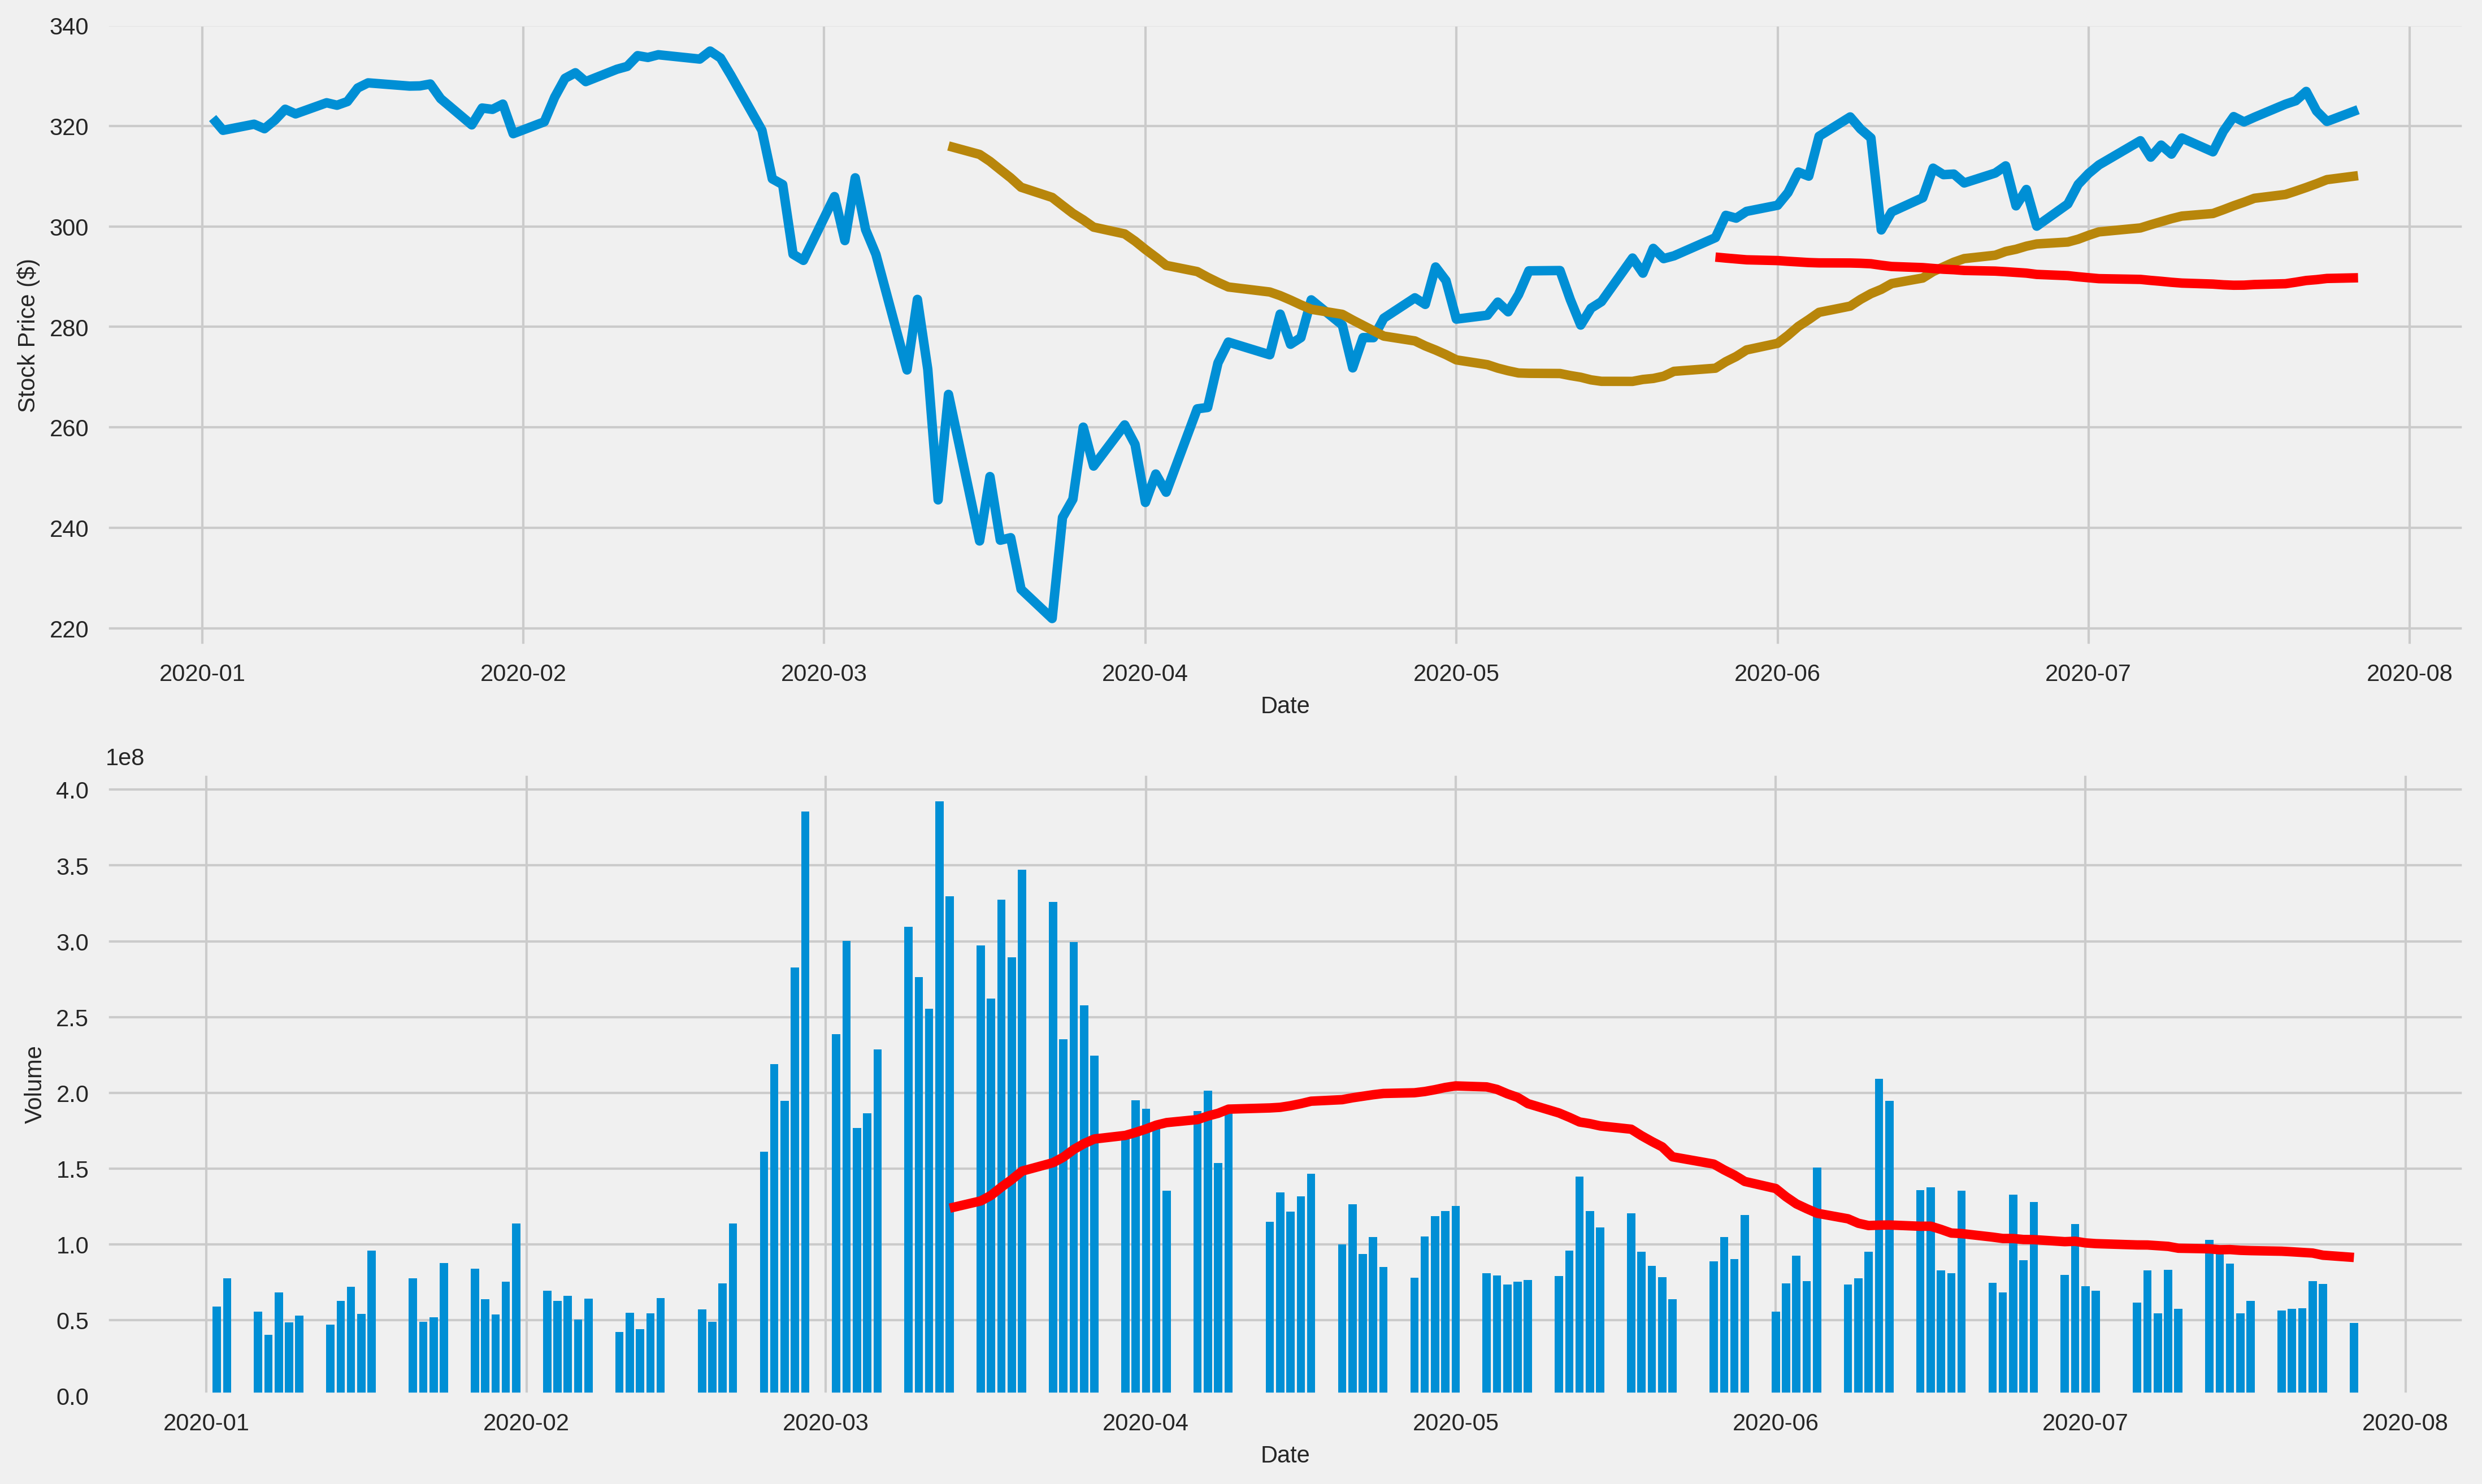

In [16]:
# Plot SPY's price with volume including the 50 and 100 day moving average and the average volume
plt.style.use('fivethirtyeight')

plt.subplot(211)                                            # SPY's price chart
plt.xlabel('Date', fontsize=10)                             # Label x-axis 
plt.ylabel('Stock Price ($)', fontsize=10)                  # Label y-axis
plt.plot(close, label="SPY's Adjusted Close Price")         # Plot the close prices
plt.plot(sma50_for_chart, 'darkgoldenrod')                  # Plot to 50 SMA
plt.plot(sma100_for_chart, 'r')                             # Plot the 100 SMA

plt.subplot(212)                                            # Volume plot
plt.xlabel('Date', fontsize=10)                             # Label x-axis
plt.ylabel('Volume', fontsize=10)                           # Label y-axis
plt.bar(date, volume)                                       # Plot the volume as a bar chart
plt.plot(date, sma50_for_volume, 'r')                       # Plot the average volume as a 50 day average (the standard in ThinkorSwim)

plt.tight_layout                                            # Tight layout format
plt.show                                                    # Show chart